In [20]:
import os
import numpy
import cv2
import matplotlib.pyplot
from PIL import Image
import tensorflow

In [2]:
# width = 1640
width_standard= 1640
height_standard = 590
# width = 1152
# height = 192

width = 512
height = 128

In [3]:
fileTrain = "./DataTrain"
fileVal = "./DataVal"
fileSaveTrain = "./DataClean/Train"
fileSaveVal = "./DataClean/Val"
fileSave = "./DataClean"

fileXTrain = "./DataClean/Train/X"
fileYTrain = "./DataClean/Train/Y"
fileXVal = "./DataClean/Val/X"
fileYVal = "./DataClean/Val/Y"

fileDiscriminatorRaw = "./DataDiscriminator/Raw"
fileDataDiscriminatorTrue = "./DataDiscriminator/DataTrue"

fileDataDiscriminatorXTrue = "./DataDiscriminator/DataTrue/X"
fileDataDiscriminatorYTrue = "./DataDiscriminator/DataTrue/Y"
fileDataDiscriminatorPredict = "./DataDiscriminator/DataFalse"

In [4]:
x = 0
y = 0

def read_data_file(path):
    i = 0
    images = []
    for file in os.listdir(path):
        file_name = os.path.join(path, file)
        # print(file_name)
        if (".jpg" in file):
            img = numpy.array(Image.open(file_name))
            images.append(img)
            # matplotlib.pyplot.imshow(img)
            # matplotlib.pyplot.show()
        i = i + 1
        if (i == 2):
            break
    return images

In [5]:
xImage = read_data_file(fileDataDiscriminatorXTrue)

yImagePredict = []

In [6]:
print(len(xImage))


2


In [7]:
gen_pix = tensorflow.keras.models.load_model('model_gen_17k_04-22_20-35_0.975.h5')
gen_pix.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 512, 16  272         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 64, 256, 16)  0           ['conv2d[0][0]']                 
                                                                                              

In [8]:
length = len(xImage)
xImage1 = xImage[:int(length /2)]
xImage2 = xImage[int(length /2):]

In [9]:
print(len(xImage))
print(len(xImage1) + len(xImage2))

2
2


In [10]:
xImage1 = numpy.array(xImage1)
print(xImage1.shape)
xImage2 = numpy.array(xImage2)
print(xImage2.shape)


(1, 128, 512)
(1, 128, 512)


In [11]:
yImagePredict1 = gen_pix.predict(xImage1)

1/1 [==============================] - 4s 4s/step


In [12]:
length = len(yImagePredict1)
length

1

In [13]:
for i in range(length):
    file_name = os.path.join(fileDataDiscriminatorPredict, f'{i}.jpg')
    cv2.imwrite(file_name, yImagePredict1[i] * 255)

In [14]:
del yImagePredict1
del xImage1
yImagePredict2 = gen_pix.predict(xImage2)

1/1 [==============================] - 0s 28ms/step


In [15]:
for i in range(len(yImagePredict2)):
    file_name = os.path.join(fileDataDiscriminatorPredict, f'{i + length}.jpg')
    cv2.imwrite(file_name, yImagePredict2[i] * 255)

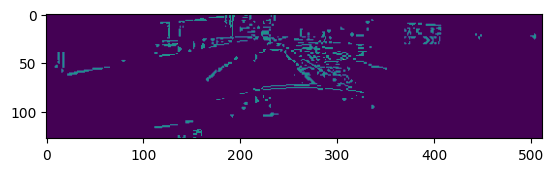

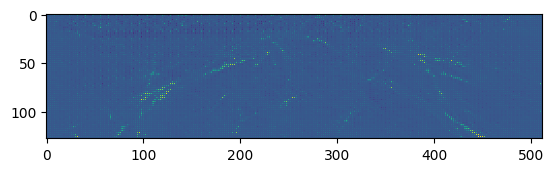

In [21]:
matplotlib.pyplot.imshow(xImage2[0])
matplotlib.pyplot.show()
matplotlib.pyplot.imshow(yImagePredict2[0])
matplotlib.pyplot.show()

In [60]:
20 + length

3865